In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
import scipy.stats as stats

# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['MMSE']
non_diagnosed = df[df['Diagnosis'] == 0]['MMSE']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: -11.309959795202289, p-value: 7.537247541446761e-29


In [4]:
from scipy.stats import chi2_contingency

# Example Chi-square test: Diagnosis status and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')


chi2: 0.8597155201269622, p-value: 0.35381831348465786


In [5]:
correlation, p_value = stats.pearsonr(df['Age'], df['MMSE'])
print(f'Correlation coefficient: {correlation}, p-value: {p_value}')


Correlation coefficient: -0.004234771200121321, p-value: 0.8444542124312051


In [6]:
import statsmodels.api as sm

X = df[['Age', 'EducationLevel', 'BMI', 'CholesterolTotal']]
y = df['MMSE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MMSE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4582
Date:                Sun, 28 Jul 2024   Prob (F-statistic):              0.766
Time:                        11:54:16   Log-Likelihood:                -7675.3
No. Observations:                2149   AIC:                         1.536e+04
Df Residuals:                    2144   BIC:                         1.539e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.3111      2.029  

In [7]:
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'EducationLevel', 'BMI', 'CholesterolTotal']]
y = df['Diagnosis']
model = LogisticRegression().fit(X, y)
print(model.coef_, model.intercept_)


[[-0.0018082  -0.10122323  0.00731679  0.00022699]] [-0.59251429]


In [8]:
import statsmodels.api as sm

X = df[['Age', 'EducationLevel', 'BMI', 'CholesterolTotal']]
y = df['MMSE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MMSE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4582
Date:                Sun, 28 Jul 2024   Prob (F-statistic):              0.766
Time:                        11:54:20   Log-Likelihood:                -7675.3
No. Observations:                2149   AIC:                         1.536e+04
Df Residuals:                    2144   BIC:                         1.539e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.3111      2.029  

In [9]:
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'EducationLevel', 'BMI', 'CholesterolTotal']]
y = df['Diagnosis']
model = LogisticRegression().fit(X, y)
print(model.coef_, model.intercept_)

[[-0.0018082  -0.10122323  0.00731679  0.00022699]] [-0.59251429]


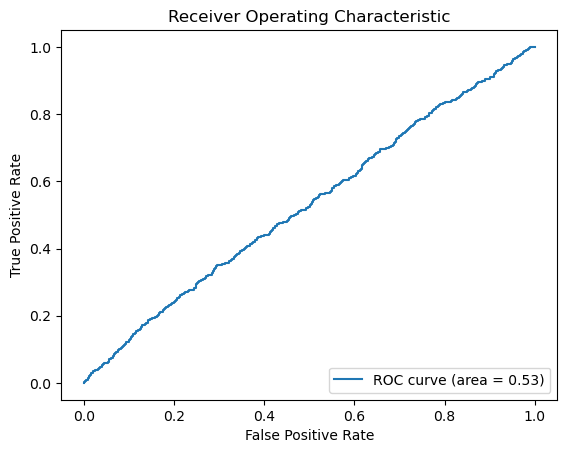

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = roc_auc_score(y, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

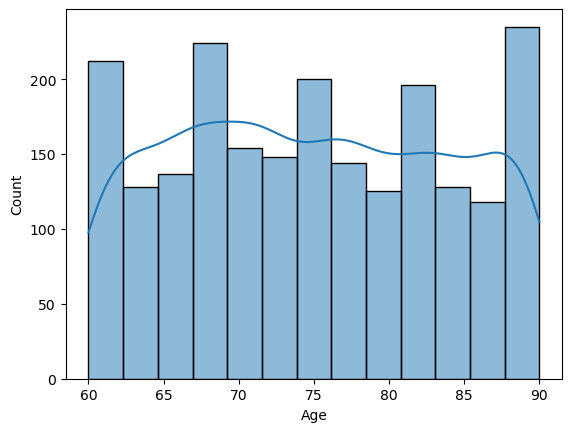

In [11]:
import seaborn as sns

# Histograms and Box Plots for continuous variables
sns.histplot(df['Age'], kde=True)
# sns.boxplot(x='Diagnosis', y='MMSE', data=df["Gender","Smoking"])

# # Scatter Plot for correlation
# sns.scatterplot(x='Age', y='MMSE', hue='Diagnosis', data=df["Gender","Smoking"])

# # Heatmap for correlation matrix
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Diagnosis', ylabel='MMSE'>

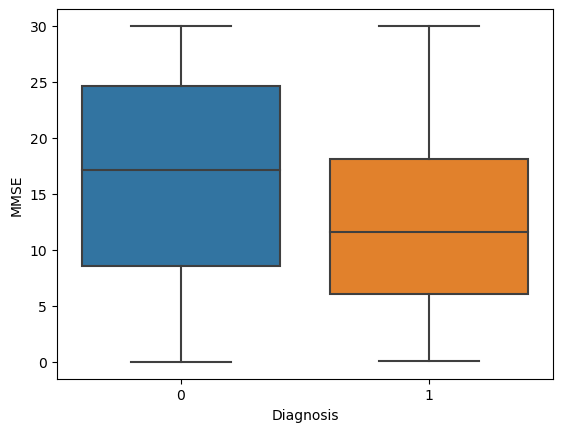

In [12]:
sns.boxplot(x='Diagnosis', y='MMSE', data=df)

<Axes: xlabel='Age', ylabel='MMSE'>

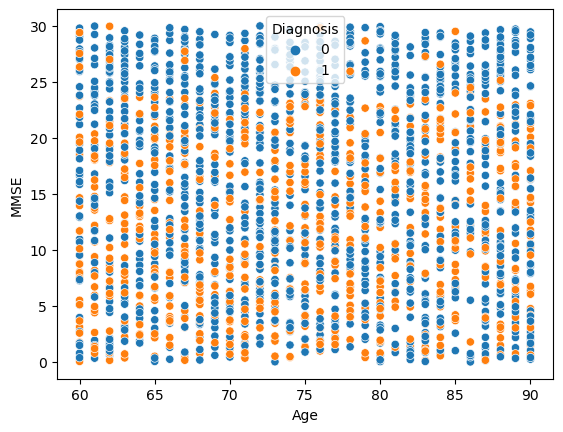

In [13]:
sns.scatterplot(x='Age', y='MMSE', hue='Diagnosis', data=df)


<Axes: >

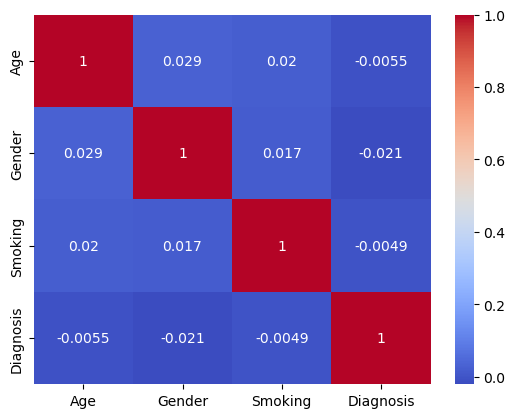

In [14]:
corr_matrix = df[["Age", "Gender","Smoking","Diagnosis"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset (assuming the dataset is in a CSV file called 'alzheimers_data.csv')
df = pd.read_csv('alzheimers_disease_data.csv')

# Display the first few rows of the dataset
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [16]:
# Display basic information about the dataset
df.info()

# Display summary statistics for numerical variables
df.describe()

# Display summary statistics for categorical variables
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

,DoctorInCharge
count,2149
unique,1
top,XXXConfid
freq,2149


PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

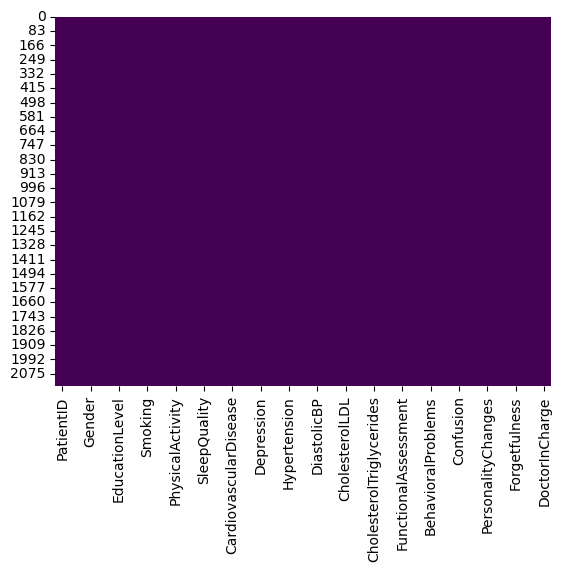

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Optionally, you can visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


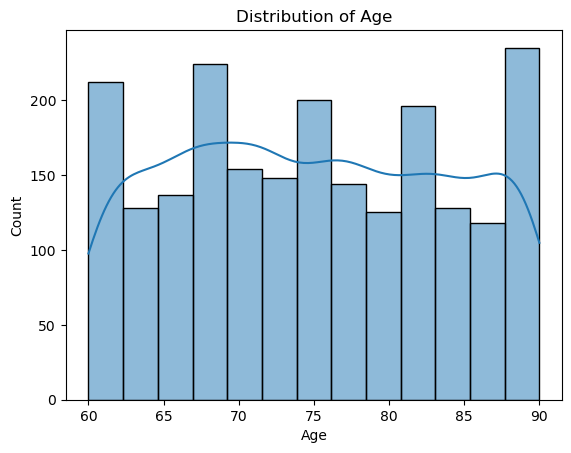

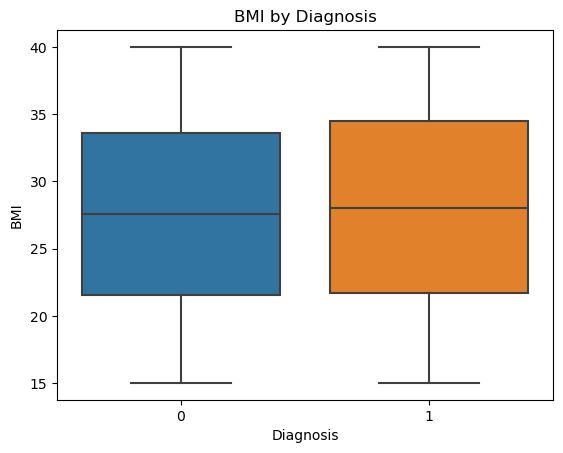

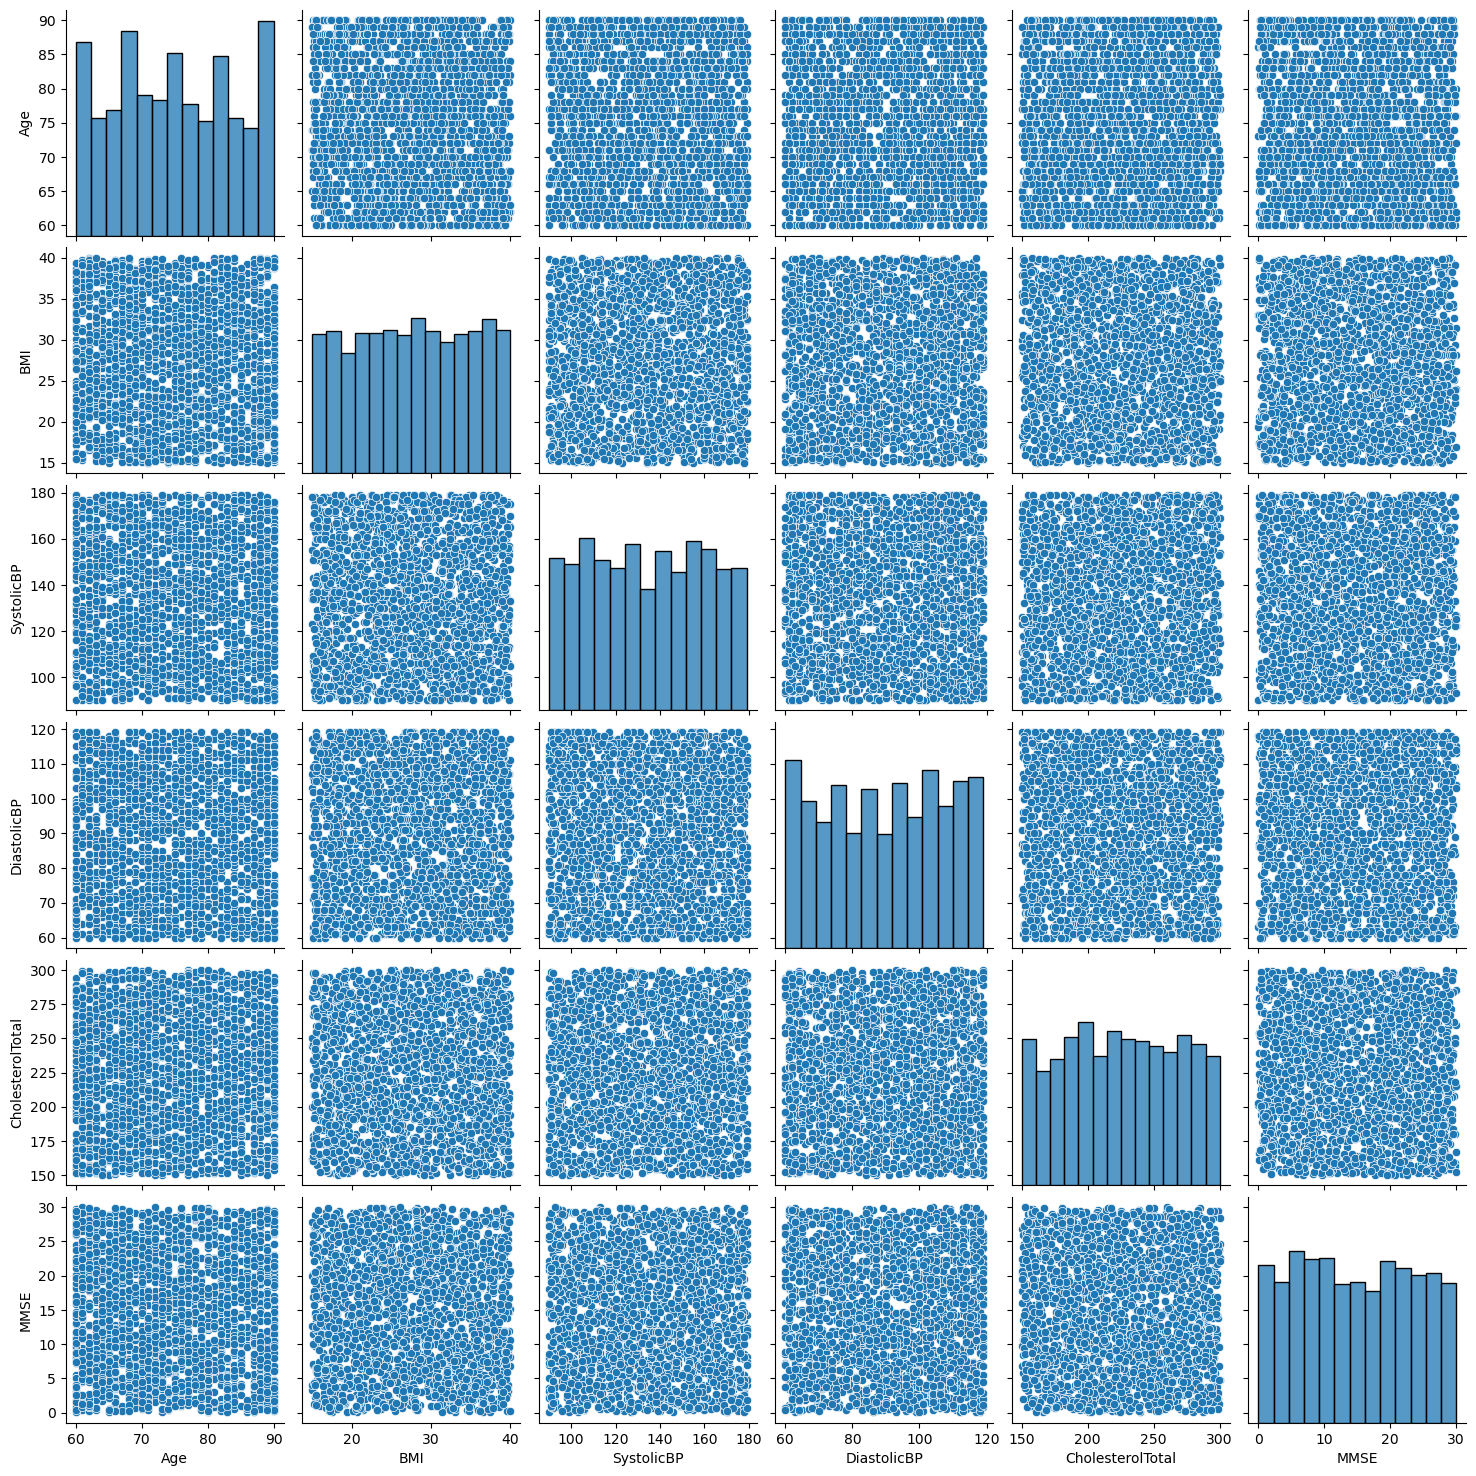

In [18]:
# Histogram for Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Boxplot for BMI
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title('BMI by Diagnosis')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'MMSE']])
plt.show()

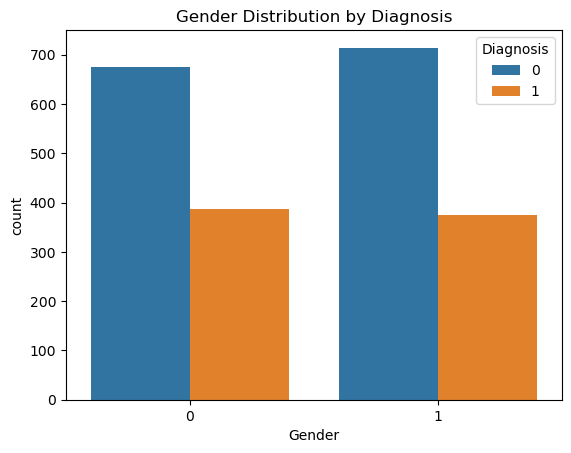

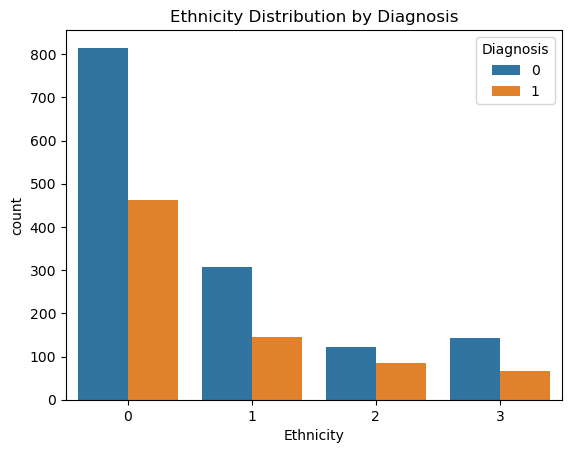

In [19]:
# Bar plot for Gender
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title('Gender Distribution by Diagnosis')
plt.show()

# Bar plot for Ethnicity
sns.countplot(x='Ethnicity', hue='Diagnosis', data=df)
plt.title('Ethnicity Distribution by Diagnosis')
plt.show()

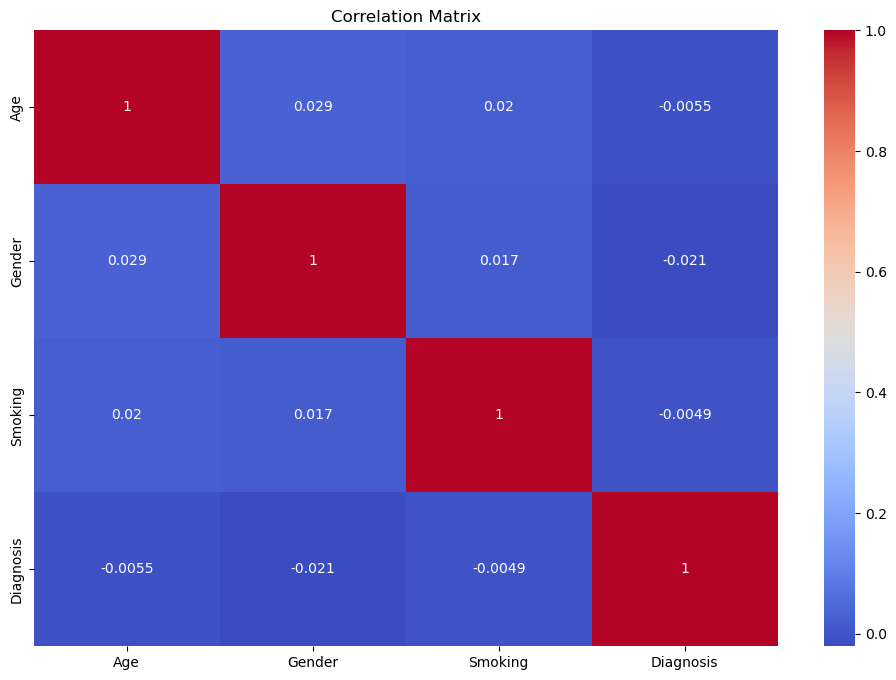

In [20]:
# Correlation matrix
corr_matrix = df[["Age", "Gender","Smoking","Diagnosis"]].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

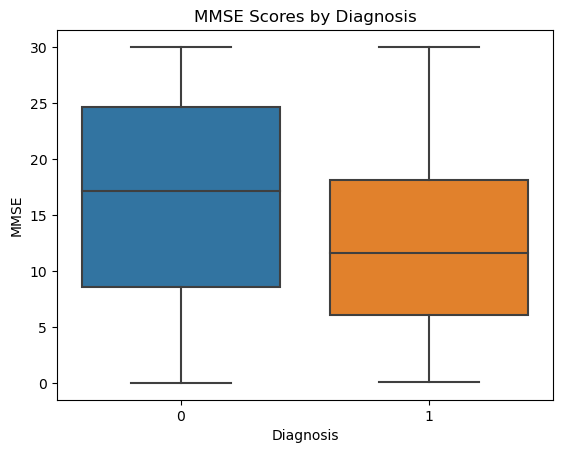

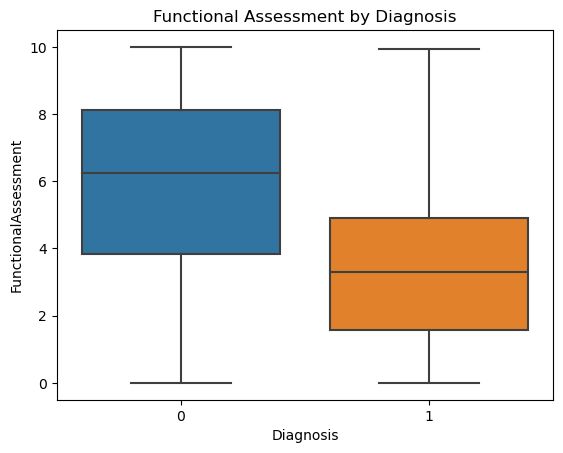

In [21]:
# Boxplot for MMSE by Diagnosis
sns.boxplot(x='Diagnosis', y='MMSE', data=df)
plt.title('MMSE Scores by Diagnosis')
plt.show()

# Boxplot for FunctionalAssessment by Diagnosis
sns.boxplot(x='Diagnosis', y='FunctionalAssessment', data=df)
plt.title('Functional Assessment by Diagnosis')
plt.show()

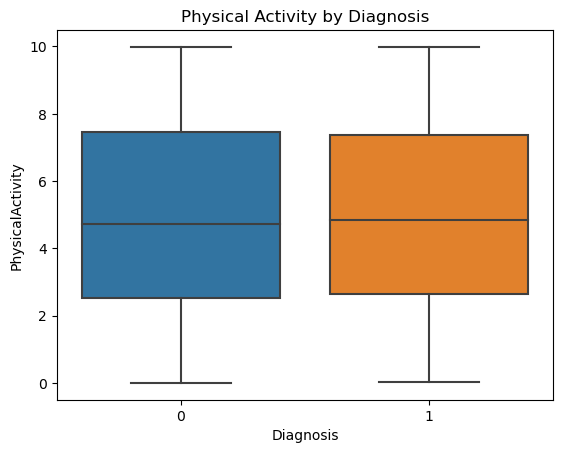

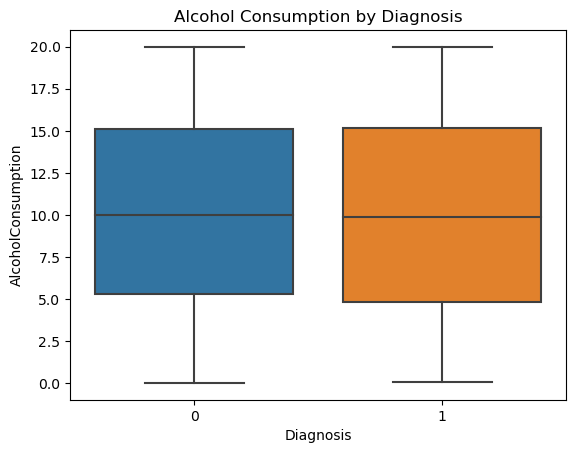

In [22]:
# Boxplot for PhysicalActivity by Diagnosis
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title('Physical Activity by Diagnosis')
plt.show()

# Boxplot for AlcoholConsumption by Diagnosis
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=df)
plt.title('Alcohol Consumption by Diagnosis')
plt.show()

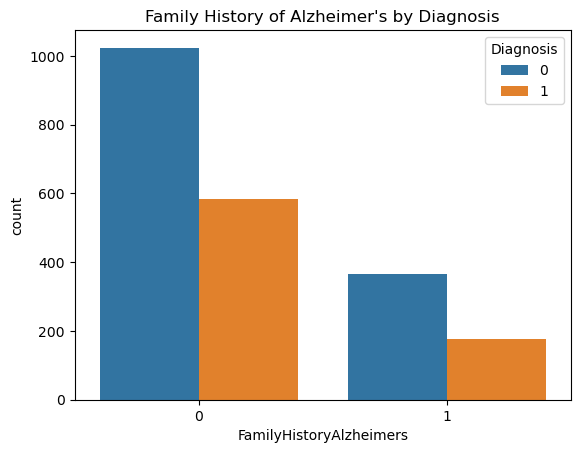

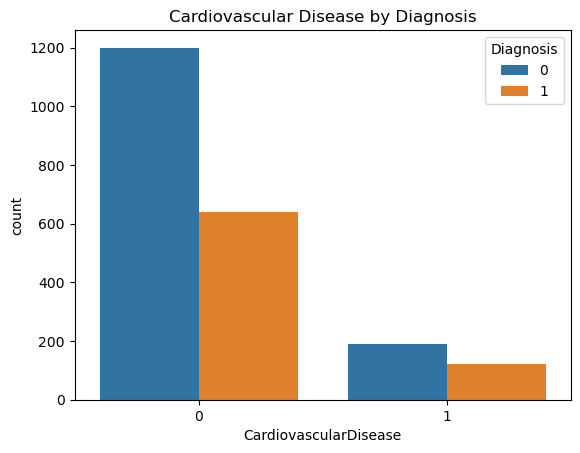

In [23]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=df)
plt.title('Family History of Alzheimer\'s by Diagnosis')
plt.show()

# Bar plot for CardiovascularDisease
sns.countplot(x='CardiovascularDisease', hue='Diagnosis', data=df)
plt.title('Cardiovascular Disease by Diagnosis')
plt.show()

# Repeat for other medical history variables...


In [52]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['CardiovascularDisease']
non_diagnosed = df[df['Diagnosis'] == 0]['CardiovascularDisease']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['CardiovascularDisease'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: 1.4598475957848813, p-value: 0.14447826335769215
chi2: 1.9476831277338071, p-value: 0.1628367346921118


In [53]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['FamilyHistoryAlzheimers']
non_diagnosed = df[df['Diagnosis'] == 0]['FamilyHistoryAlzheimers']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['FamilyHistoryAlzheimers'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -1.5252595517060816, p-value: 0.12734165640205952
chi2: 2.170309071104257, p-value: 0.14069795394928386


In [50]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['MMSE']
non_diagnosed = df[df['Diagnosis'] == 0]['MMSE']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['MMSE'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -11.309959795202289, p-value: 7.537247541446761e-29
chi2: 2149.0, p-value: 0.4898576962191864


In [51]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['Gender']
non_diagnosed = df[df['Diagnosis'] == 0]['Gender']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['Gender'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -0.9720923937981277, p-value: 0.33111408758275207
chi2: 0.8597155201269622, p-value: 0.35381831348465786


In [25]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['Smoking']
non_diagnosed = df[df['Diagnosis'] == 0]['Smoking']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['Smoking'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -0.22543689909412226, p-value: 0.8216608645772163
chi2: 0.030886776214044256, p-value: 0.860493227376371


In [26]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['AlcoholConsumption']
non_diagnosed = df[df['Diagnosis'] == 0]['AlcoholConsumption']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['AlcoholConsumption'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -0.3529943822153439, p-value: 0.7241273042912555
chi2: 2149.0, p-value: 0.4898576962191864


In [27]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['EducationLevel']
non_diagnosed = df[df['Diagnosis'] == 0]['EducationLevel']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['EducationLevel'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -2.039161593852011, p-value: 0.04155613162581501
chi2: 4.453147172785709, p-value: 0.2165077197332475


In [63]:
def categorize_education_level(education_level):
    if education_level == 0:
        return 'None'
    elif education_level == 1:
        return 'High School'
    elif education_level == 2:
        return "Bachelor's"
    elif education_level == 3:
        return 'Higher'

# Apply the function to create the new column 'EducationLevelGroup'
df['EducationLevelGroup'] = df['EducationLevel'].apply(categorize_education_level)

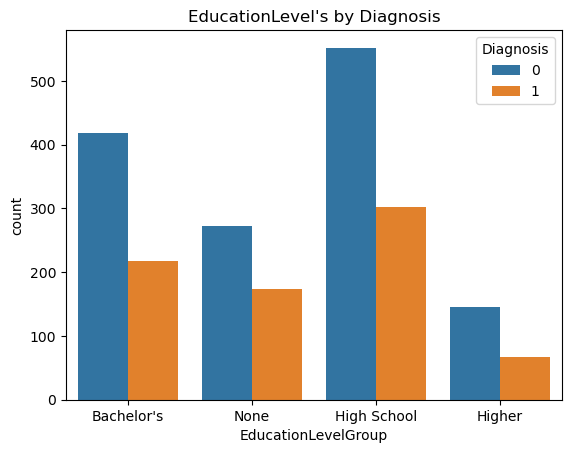

In [66]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='EducationLevelGroup', hue='Diagnosis', data=df)
plt.title('EducationLevel\'s by Diagnosis')
plt.show()

In [68]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
# diagnosed = df[df['Diagnosis'] == 1]['EducationLevelGroup']
# non_diagnosed = df[df['Diagnosis'] == 0]['EducationLevelGroup']
# t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
# print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['EducationLevelGroup'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

chi2: 4.453147172785708, p-value: 0.21650771973324673


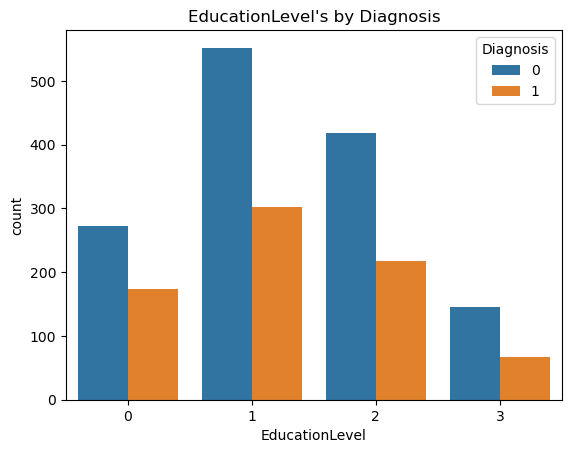

In [28]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='EducationLevel', hue='Diagnosis', data=df)
plt.title('EducationLevel\'s by Diagnosis')
plt.show()

In [29]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['SleepQuality']
non_diagnosed = df[df['Diagnosis'] == 0]['SleepQuality']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['SleepQuality'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -2.624396279146679, p-value: 0.00874180076179296
chi2: 2149.0, p-value: 0.4898576962191864


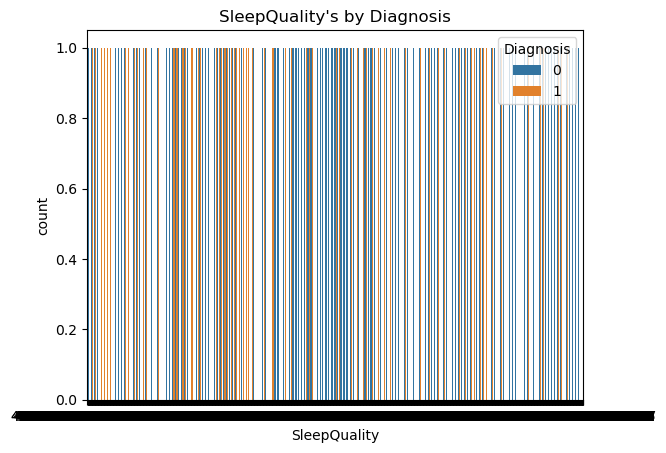

In [30]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='SleepQuality', hue='Diagnosis', data=df)
plt.title('SleepQuality\'s by Diagnosis')
plt.show()

In [31]:
df['SleepQuality'].value_counts()

9.025679    1
5.303641    1
9.988452    1
8.944899    1
7.014251    1
           ..
7.633571    1
8.099905    1
9.300057    1
6.734356    1
9.878711    1
Name: SleepQuality, Length: 2149, dtype: int64

In [32]:
# bins = [3, 5, 7, 10]
# labels = ['Low', 'Medium', 'High']

# # Create a new column with the binned data
# df['SleepQualityGroup'] = pd.cut(df['SleepQuality'], bins=bins, labels=labels, right=True)
# sns.countplot(x='SleepQuality', hue='Diagnosis', data=df)
# plt.title('SleepQuality\'s by Diagnosis')
# plt.show()

In [33]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['MemoryComplaints']
non_diagnosed = df[df['Diagnosis'] == 0]['MemoryComplaints']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['MemoryComplaints'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: 14.93301538345669, p-value: 4.760134346533903e-48
chi2: 200.62370423042574, p-value: 1.5266050985264054e-45


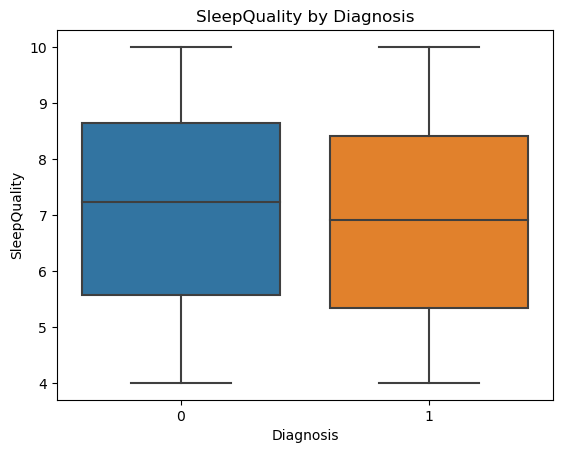

In [54]:
# Boxplot for PhysicalActivity by Diagnosis
sns.boxplot(x='Diagnosis', y='SleepQuality', data=df)
plt.title('SleepQuality by Diagnosis')
plt.show()

In [35]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['SleepQuality']
non_diagnosed = df[df['Diagnosis'] == 0]['SleepQuality']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['SleepQuality'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -2.624396279146679, p-value: 0.00874180076179296
chi2: 2149.0, p-value: 0.4898576962191864


In [55]:
# Define the function to categorize SleepQuality
def categorize_sleep_quality(sleep_quality):
    if sleep_quality < 6:
        return 'Poor'
    elif sleep_quality <= 8:
        return 'Moderate'
    else:
        return 'Good'

# Apply the function to create the new column 'Sleep'
df['Sleep'] = df['SleepQuality'].apply(categorize_sleep_quality)

In [56]:
df['Sleep'].value_counts()

Good        749
Moderate    713
Poor        687
Name: Sleep, dtype: int64

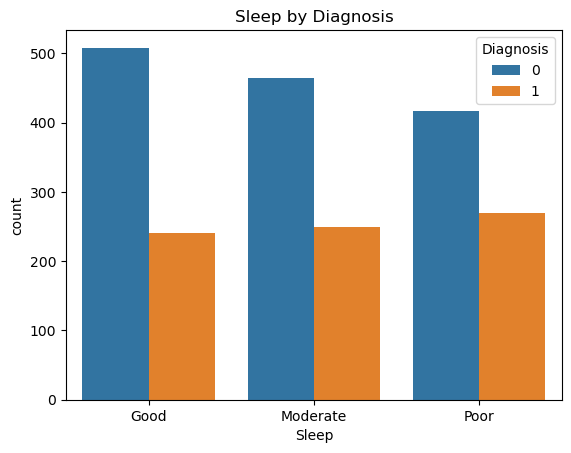

In [57]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='Sleep', hue='Diagnosis', data=df)
plt.title('Sleep by Diagnosis')
plt.show()

In [59]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['Sleep']
non_diagnosed = df[df['Diagnosis'] == 0]['Sleep']
# t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
# print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['Sleep'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

chi2: 8.049665203354628, p-value: 0.01786641471085491


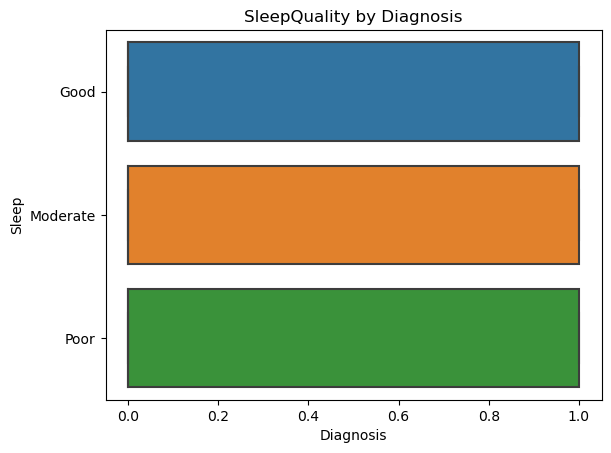

In [69]:
# Boxplot for PhysicalActivity by Diagnosis
sns.boxplot(x='Diagnosis', y='Sleep', data=df)
plt.title('SleepQuality by Diagnosis')
plt.show()

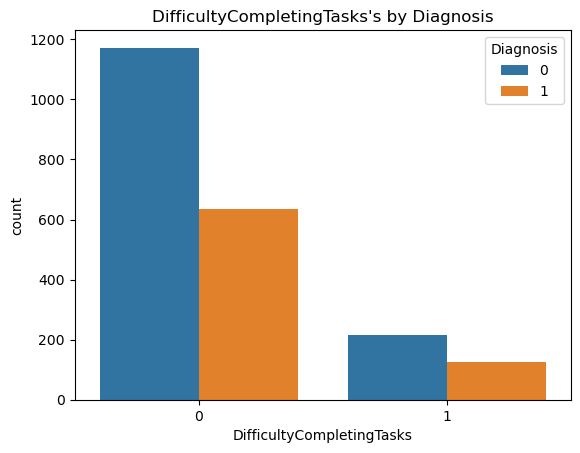

In [36]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='DifficultyCompletingTasks', hue='Diagnosis', data=df)
plt.title('DifficultyCompletingTasks\'s by Diagnosis')
plt.show()

In [43]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['DifficultyCompletingTasks']
non_diagnosed = df[df['Diagnosis'] == 0]['DifficultyCompletingTasks']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['DifficultyCompletingTasks'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: 0.42021664998385244, p-value: 0.6743692429733699
chi2: 0.1286310225412865, p-value: 0.7198556855473033


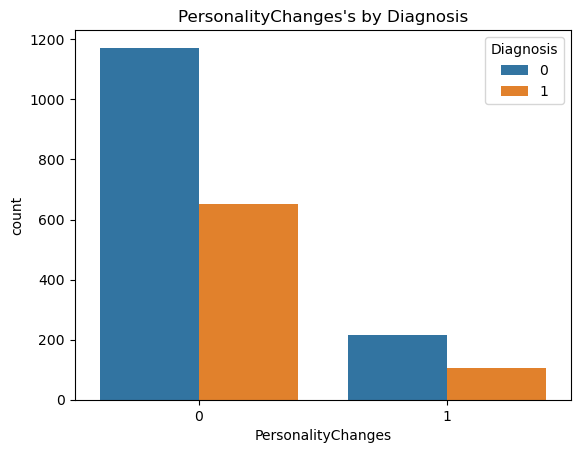

In [37]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='PersonalityChanges', hue='Diagnosis', data=df)
plt.title('PersonalityChanges\'s by Diagnosis')
plt.show()

In [44]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['PersonalityChanges']
non_diagnosed = df[df['Diagnosis'] == 0]['PersonalityChanges']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['PersonalityChanges'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -0.9559919678205971, p-value: 0.3391839196804013
chi2: 0.7977827910613255, p-value: 0.37175710638032144


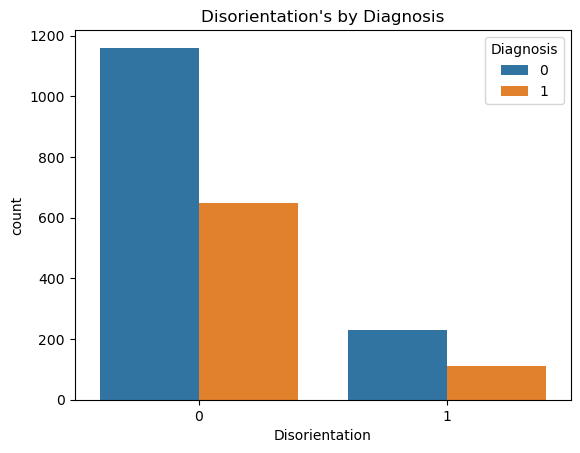

In [38]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='Disorientation', hue='Diagnosis', data=df)
plt.title('Disorientation\'s by Diagnosis')
plt.show()

In [45]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['Disorientation']
non_diagnosed = df[df['Diagnosis'] == 0]['Disorientation']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['Disorientation'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -1.14243746418979, p-value: 0.2533996103169852
chi2: 1.168139870214583, p-value: 0.27978377696750084


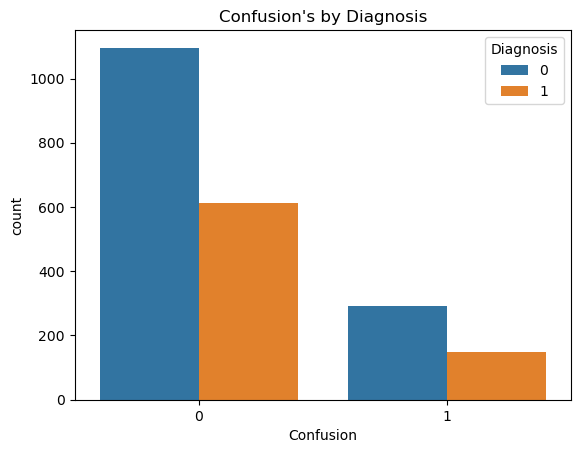

In [39]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='Confusion', hue='Diagnosis', data=df)
plt.title('Confusion\'s by Diagnosis')
plt.show()

In [46]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['Confusion']
non_diagnosed = df[df['Diagnosis'] == 0]['Confusion']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['Confusion'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -0.8891480118313203, p-value: 0.3740231473563983
chi2: 0.6947855762350034, p-value: 0.4045413830124688


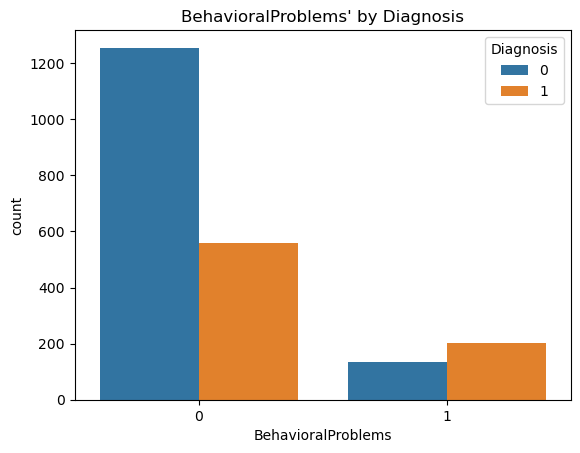

In [40]:
# Bar plot for FamilyHistoryAlzheimers
sns.countplot(x='BehavioralProblems', hue='Diagnosis', data=df)
plt.title('BehavioralProblems\' by Diagnosis')
plt.show()

In [47]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['BehavioralProblems']
non_diagnosed = df[df['Diagnosis'] == 0]['BehavioralProblems']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['BehavioralProblems'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: 10.667366635469879, p-value: 6.369488144465179e-26
chi2: 106.8792165385845, p-value: 4.731446795211873e-25


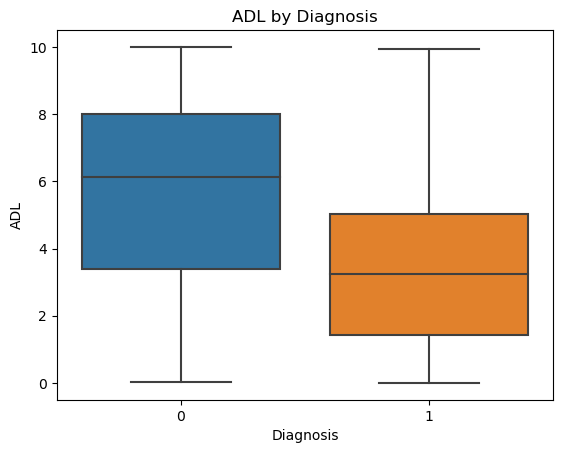

In [41]:
# Boxplot for PhysicalActivity by Diagnosis
sns.boxplot(x='Diagnosis', y='ADL', data=df)
plt.title('ADL by Diagnosis')
plt.show()

In [48]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['ADL']
non_diagnosed = df[df['Diagnosis'] == 0]['ADL']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['ADL'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: -16.32759113355178, p-value: 1.396884450520792e-56
chi2: 2149.0, p-value: 0.4898576962191864


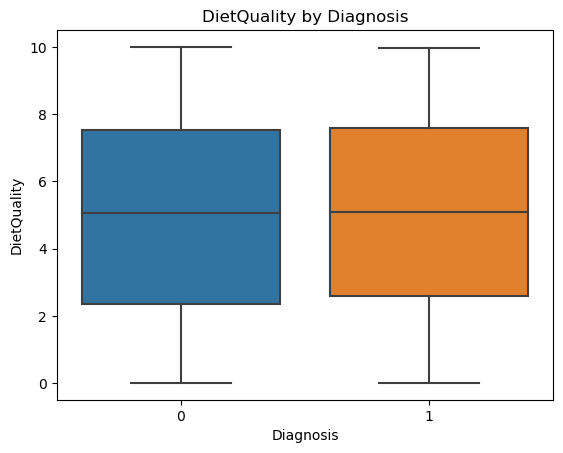

In [42]:
# Boxplot for PhysicalActivity by Diagnosis
sns.boxplot(x='Diagnosis', y='DietQuality', data=df)
plt.title('DietQuality by Diagnosis')
plt.show()

In [49]:
# Example t-test: MMSE scores between diagnosed and non-diagnosed patients
diagnosed = df[df['Diagnosis'] == 1]['DietQuality']
non_diagnosed = df[df['Diagnosis'] == 0]['DietQuality']
t_stat, p_value = stats.ttest_ind(diagnosed, non_diagnosed)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Chi-square test for Diagnosis and Gender
contingency_table = pd.crosstab(df['Diagnosis'], df['DietQuality'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p-value: {p}')

t-statistic: 0.39413539319301494, p-value: 0.6935202235677094
chi2: 2149.0, p-value: 0.4898576962191864
